In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
from scipy.stats import norm, cauchy
from scipy.optimize import curve_fit

# Exercise 02.1: Monte Carlo Integration
Compute the following 1D integral via Monte Carlo:

$$
I = \int_0^1 \frac{\pi}{2}\cos\left(\frac{\pi x}{2}\right) dx = 1.
$$

## Two Approaches

1. **Uniform Sampling**  
   Sample from a uniform distribution in $[0,1]$.

2. **Importance Sampling**  
   Sample from a non-uniform probability distribution in $[0,1]$.

## Monte Carlo Integration Overview

When computing an integral using the Monte Carlo method, we usually rewrite the integrand $f(x)$ as the product of a trial function $g(x)$ and a normalized probability distribution $p(x)$:

$$
I = \int_{\Omega} p(x)\,g(x)\,dx.
$$

### Estimation Formula

If we draw $N$ samples $x_i$ according to the distribution $p(x)$, an estimator for the integral is given by:

$$
G_N = \frac{1}{N} \sum_{i=1}^N g(x_i).
$$

This approach is powerful because:

- You can choose **any** normalized probability distribution $p(x)$.
- The expected value of $G_N$ converges to $I$ as $N$ increases.
- You can use advanced techniques like **blocking average** to reduce statistical fluctuations and improve accuracy.

#### Uniform Sampling


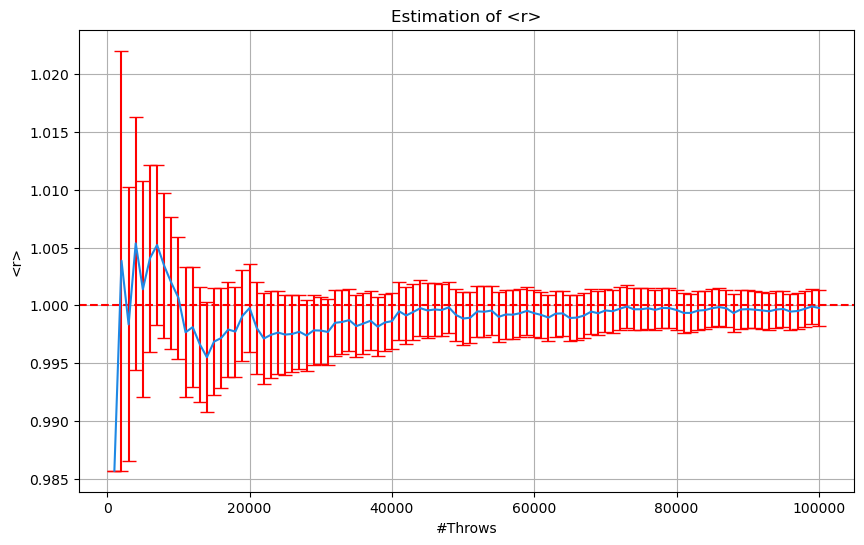

In [3]:
# Leggi i dati dal file
data = pd.read_csv('02.1/dataUniform.dat',sep=' ', header=None)
x = data[0]
y = data[1]
yerr = data[2]

plt.figure(1,figsize=(10, 6))
plt.errorbar(x, y, yerr=yerr, color = '#1E88E5', ecolor='r', capsize=5)
plt.axhline(y=1, color='r', linestyle='--')
plt.xlabel('#Throws')
plt.ylabel('<r>')
plt.title('Estimation of <r>')
plt.grid(True)
plt.show()


### Importance Sampling 
The normalized first order expansion in $x=1$ for the integrand is $f(x) = 2 - 2x \quad \text{for } x \in [0,1]$, which is a valid probability density function since  $$\int_0^1 (2-2x)\,dx = \Big[ 2x - x^2 \Big]_0^1 = 1.$$

#### 1. Calculation of the Cumulative Distribution Function (CDF)  
The cumulative distribution function $F(x)$ is given by $F(x) = \int_0^x (2 - 2t)\, dt.$  
Calculating the integral: $ F(x) = \left[ 2t - t^2 \right]_0^x = 2x - x^2.$

#### 2. Calculation of the Inverse CDF (Quantile Function)  
To find the inverse function $F^{-1}(p)$, we solve the equation $ p = F(x) = 2x - x^2 $, i.e.,  
$x^2 - 2x + p = 0.$
Since this is a quadratic equation in $x$, we apply the quadratic formula:  $$x = \frac{2 \pm \sqrt{4 - 4p}}{2} = 1 \pm \sqrt{1 - p}.$$
Observing that for $p \in [0,1]$, the solution $x = 1 + \sqrt{1 - p}$ produces values greater than 1, while the correct solution is  
$x = 1 - \sqrt{1 - p}.$
Thus, the inverse cumulative distribution function (quantile function) is  
$$F^{-1}(p) = 1 - \sqrt{1 - p} \quad \text{for } p \in [0,1].$$

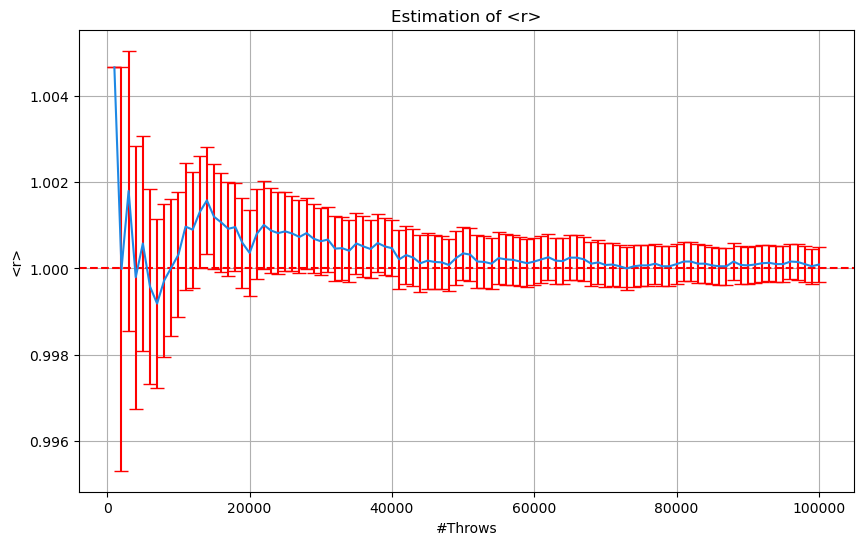

In [4]:
# Leggi i dati dal file
data = pd.read_csv('02.1/dataSampling.dat',sep=' ', header=None)

# Estrai le colonne
x = data[0]
y = data[1]
yerr = data[2]

# Crea il grafico con barre di errore
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, yerr=yerr, color = '#1E88E5', ecolor='r', capsize=5)
plt.axhline(y=1, color='r', linestyle='--')
plt.xlabel('#Throws')
plt.ylabel('<r>')
plt.title('Estimation of <r>')
plt.grid(True)
plt.show()

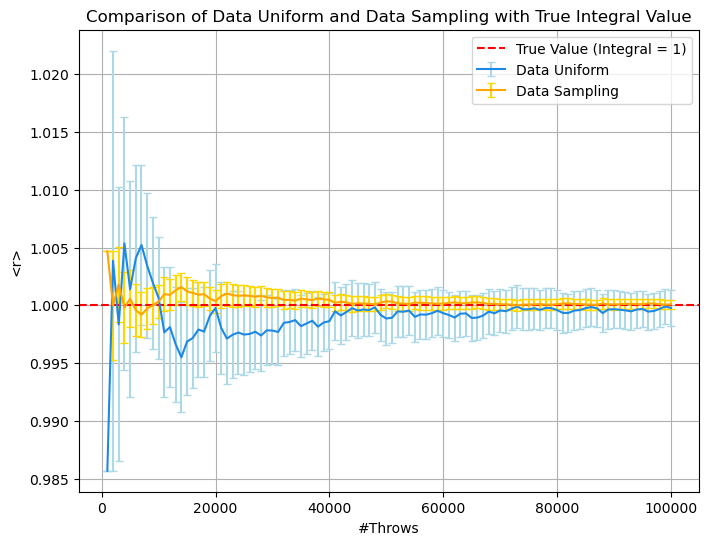

In [5]:
data_uniform = pd.read_csv('02.1/dataUniform.dat', sep=' ', header=None)
data_sampling = pd.read_csv('02.1/dataSampling.dat', sep=' ', header=None)
x_uniform = data_uniform[0]
y_uniform = data_uniform[1]
yerr_uniform = data_uniform[2]

x_sampling = data_sampling[0]
y_sampling = data_sampling[1]
yerr_sampling = data_sampling[2]

plt.figure(figsize=(8, 6))

plt.errorbar(x_uniform, y_uniform, yerr=yerr_uniform, label='Data Uniform', color='#1E88E5', ecolor='lightblue', capsize=3)
plt.errorbar(x_sampling, y_sampling, yerr=yerr_sampling, label='Data Sampling', color='orange', ecolor='gold', capsize=3)
plt.axhline(y=1, color='red', linestyle='--', label='True Value (Integral = 1)')

plt.xlabel('#Throws')
plt.ylabel('<r>')
plt.title('Comparison of Data Uniform and Data Sampling with True Integral Value')
plt.legend()
plt.grid(True)

plt.show()

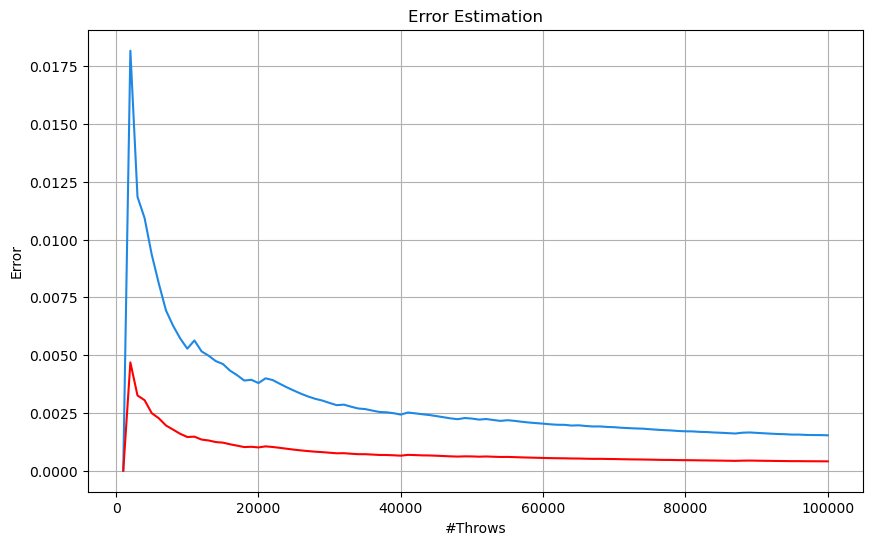

In [6]:
data = pd.read_csv('02.1/dataUniform.dat',sep=' ', header=None)
x = data[0]
yerr = data[2]

plt.figure(1,figsize=(10, 6))
plt.plot(x, yerr, color = '#1E88E5')
plt.xlabel('#Throws')
plt.ylabel('Error')
plt.title('Error Estimation')
plt.grid(True)

data1 = pd.read_csv('02.1/dataSampling.dat',sep=' ', header=None)

x1 = data1[0]
yerr1 = data1[2]

plt.figure(1, figsize=(8, 6))
plt.plot(x1, yerr1, color = 'r')
plt.xlabel('#Throws')
plt.ylabel('Error')
plt.title('Error Estimation')
plt.grid(True)


# Esercizio 2.2
- 3D Random Walks (RW) on a cubic lattice and in the continuum: Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Suggestion: divide your $M$ throws into a reasonable number of blocks, compute $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as function of the step $i\in [0,10^2]$ in each block and use these values (for fixed $i$) to obtain the average value and its statistical uncertainty.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$.


### Cubic Lattice

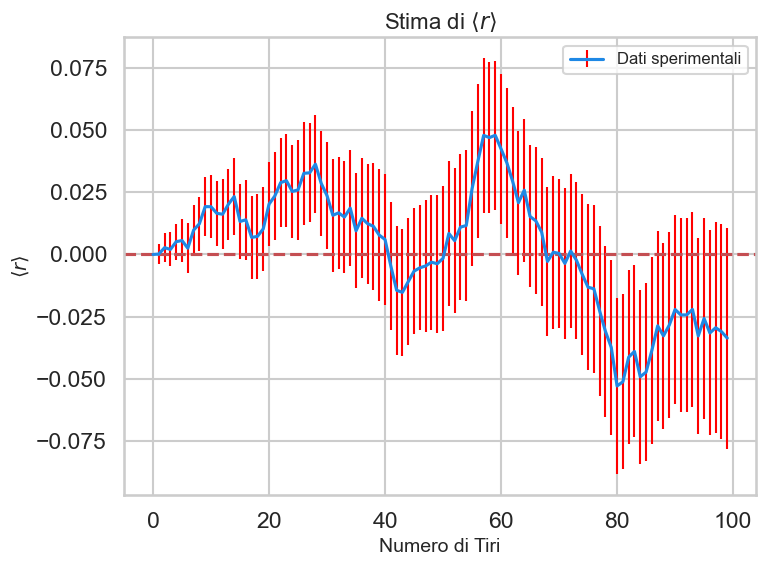

In [7]:
sns.set_theme(style="whitegrid", context="talk")

data = pd.read_csv('02.2/discrete.dat', sep=' ', header=None, names=['Throws', 'r', 'r_err'])

x = data['Throws']
y = data['r']
yerr = data['r_err']

def fit_func(x, k):
    return k * np.sqrt(x)

popt, pcov = curve_fit(fit_func, x, y)
k_opt = popt[0]

x_fit = np.linspace(x.min(), x.max(), 500)
y_fit = fit_func(x_fit, k_opt)

plt.figure(figsize=(8, 6))
plt.errorbar(x, y-np.sqrt(x+1), yerr=yerr, 
             label='Dati sperimentali', color='#1E88E5', ecolor='red', elinewidth=1.5)

#plt.plot(x_fit, y_fit, 'g--', linewidth=2, label=f'Fit:'rf' $k \sqrt{{x}}$, $k = {k_opt:.3f}$')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Numero di Tiri', fontsize=14)
plt.ylabel(rf'$\langle r \rangle$', fontsize=14)
plt.title('Stima di 'rf'$\langle r \rangle$', fontsize=16)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

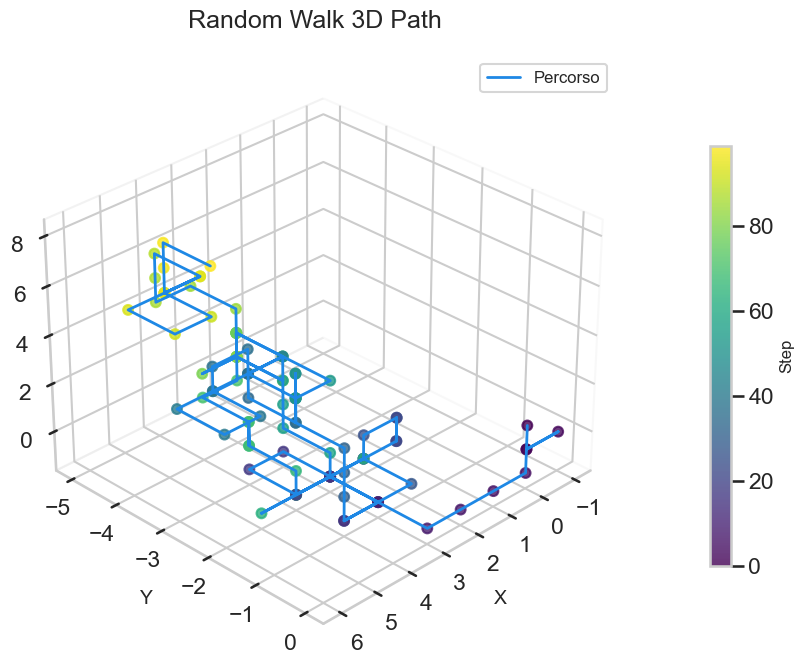

In [8]:
sns.set_theme(style="whitegrid", context="talk")
data = pd.read_csv('02.2/discreteWalk.dat', sep=' ', header=None, names=['Step', 'X', 'Y', 'Z'])

x = data['X']
y = data['Y']
z = data['Z']

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, color='#1E88E5', lw=2, label='Percorso')
sc = ax.scatter(x, y, z, c=np.arange(len(x)), cmap='viridis', s=50, alpha=0.8)

cbar = plt.colorbar(sc, ax=ax, pad=0.1, shrink=0.7)
cbar.set_label('Step', fontsize=12)

ax.set_xlabel('X', labelpad=10, fontsize=14)
ax.set_ylabel('Y', labelpad=10, fontsize=14)
ax.set_zlabel('Z', labelpad=10, fontsize=14)
ax.set_title('Random Walk 3D Path', fontsize=18, pad=20)

ax.view_init(elev=30, azim=45)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Aggiungi la legenda e visualizza il grafico
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

### Continuous Lattice

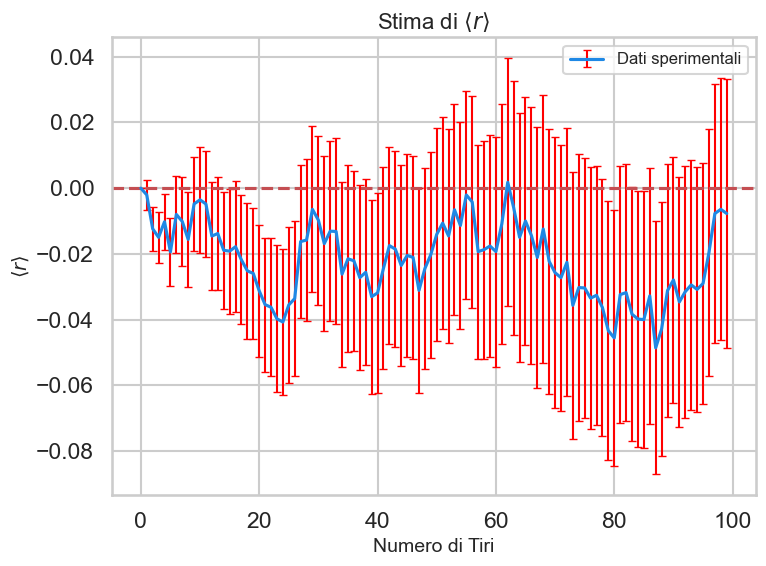

In [9]:
sns.set_theme(style="whitegrid", context="talk")
data = pd.read_csv('02.2/continuous.dat', sep=' ', header=None, names=['Throws', 'r', 'r_err'])
x = data['Throws']
y = data['r']
yerr = data['r_err']

def fit_func(x, k):
    return k * np.sqrt(x)

popt, pcov = curve_fit(fit_func, x, y)
k_opt = popt[0]

x_fit = np.linspace(x.min(), x.max(), 500)
y_fit = fit_func(x_fit, k_opt)

plt.figure(figsize=(8, 6))
plt.errorbar(x, y - np.sqrt(x+1), yerr=yerr, capsize=3, 
             label='Dati sperimentali', color='#1E88E5', ecolor = 'red', elinewidth=1.5)
#plt.plot(x_fit, y_fit, 'g--', linewidth=2, label=f'Fit:'rf' $k \sqrt{{x}}$, $k = {k_opt:.3f}$')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Numero di Tiri', fontsize=14)
plt.ylabel(rf'$\langle r \rangle$', fontsize=14)
plt.title('Stima di 'rf'$\langle r \rangle$', fontsize=16)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

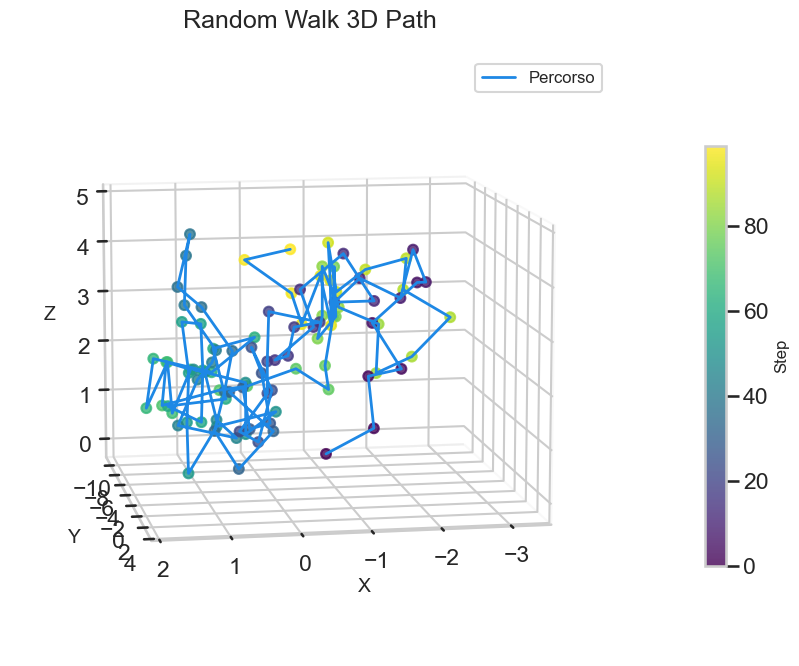

In [10]:
sns.set_theme(style="whitegrid", context="talk")
data = pd.read_csv('02.2/continuousWalk.dat', sep=' ', header=None, names=['Step', 'X', 'Y', 'Z'])
x = data['X']
y = data['Y']
z = data['Z']
fig = plt.figure(figsize=(10, 7))

ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, color='#1E88E5', lw=2, label='Percorso')
sc = ax.scatter(x, y, z, c=np.arange(len(x)), cmap='viridis', s=50, alpha=0.8)
cbar = plt.colorbar(sc, ax=ax, pad=0.1, shrink=0.7)
cbar.set_label('Step', fontsize=12)

ax.set_xlabel('X', labelpad=10, fontsize=14)
ax.set_ylabel('Y', labelpad=10, fontsize=14)
ax.set_zlabel('Z', labelpad=10, fontsize=14)
ax.set_title('Random Walk 3D Path', fontsize=18, pad=20)

ax.view_init(elev=10, azim=80)

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

### Uniform Sampling on the Unit Sphere

My initial strategy involved generating two independent random angles - the polar angle θ and azimuthal angle φ - then applying standard spherical-to-Cartesian coordinate transformations to obtain points on the unit sphere. This seemingly straightforward method has a critical flaw: it fails to produce uniform distribution across the sphere's surface. Instead, it creates a clustering bias that densely populates the polar regions while sparsely covering the equatorial zone.

Correct Implementation

To address this sampling bias, I implemented the following approach:
To obtain points such that any small area on the sphere is expected to contain the same number of points, choose U and V to be random variates on (0,1). Then $\theta	=	2\pi u	$ , $\phi	=	cos^{(-1)}(2v-1)$

#### Future Research Direction
An interesting avenue for future investigation would be to quantify the length scales at which the effects of incorrect angular selection become observable. My preliminary simulation using the flawed angle generation method exhibited characteristic patterns consistent with non-uniform sampling. Specifically, the random walk showed increased localization in the xy-plane, resulting in enhanced vertical (z-axis) displacement compared to the uniform sampling approach.

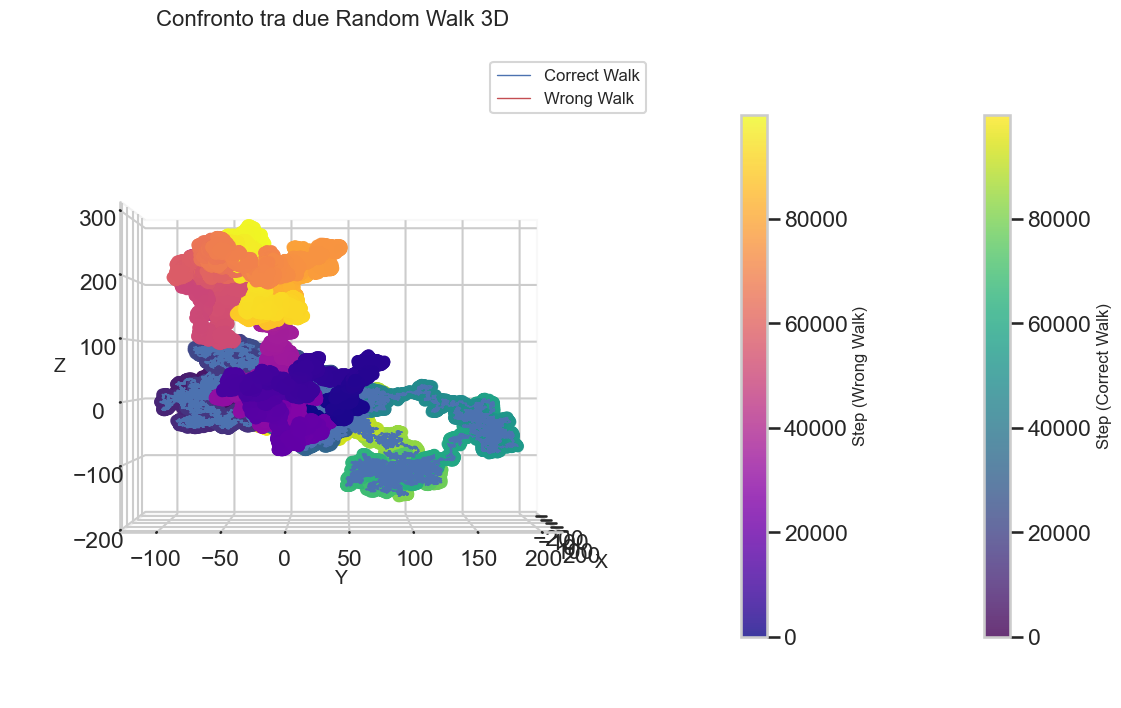

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Leggi i dati dai file
data_correct = pd.read_csv('02.2.01/continuousWalk.dat', sep=' ', header=None, names=['Step', 'X', 'Y', 'Z'])
data_wrong = pd.read_csv('02.2.01/continuousWrongWalk.dat', sep=' ', header=None, names=['Step', 'X', 'Y', 'Z'])

# Estrai le colonne
x_correct = data_correct['X']
y_correct = data_correct['Y']
z_correct = data_correct['Z']

x_wrong = data_wrong['X']
y_wrong = data_wrong['Y']
z_wrong = data_wrong['Z']

# Crea il grafico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Percorso corretto
ax.plot(x_correct, y_correct, z_correct, color='b', lw=1, label='Correct Walk')
sc_correct = ax.scatter(x_correct, y_correct, z_correct, c=np.arange(len(x_correct)), cmap='viridis', s=50, alpha=0.8)

# Percorso errato
ax.plot(x_wrong, y_wrong, z_wrong, color='r', lw=1, label='Wrong Walk')
sc_wrong = ax.scatter(x_wrong, y_wrong, z_wrong, c=np.arange(len(x_wrong)), cmap='plasma', s=50, alpha=0.8)

# Aggiungi una barra della colormap per ciascun percorso
cbar_correct = plt.colorbar(sc_correct, ax=ax, pad=0.1, shrink=0.7)
cbar_correct.set_label('Step (Correct Walk)', fontsize=12)

cbar_wrong = plt.colorbar(sc_wrong, ax=ax, pad=0.1, shrink=0.7)
cbar_wrong.set_label('Step (Wrong Walk)', fontsize=12)

# Aggiungi etichette e titolo
ax.set_xlabel('X', labelpad=10, fontsize=14)
ax.set_ylabel('Y', labelpad=10, fontsize=14)
ax.set_zlabel('Z', labelpad=10, fontsize=14)
ax.set_title('Confronto tra due Random Walk 3D', fontsize=16, pad=20)

# Imposta la vista 3D
ax.view_init(elev=0, azim=0)

# Rimuovi i pannelli di sfondo
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Aggiungi la legenda
plt.legend(fontsize=12)

# Mostra il grafico
plt.tight_layout()
plt.show()